In [1]:
'''import sys
!conda install --yes --prefix {sys.prefix} graphviz'''

'import sys\n!conda install --yes --prefix {sys.prefix} graphviz'

In [2]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [3]:
# Load data
path = "Downloads/Customer_Churn.csv"
df = pd.read_csv(path).dropna()
# Transform non numerical column to a numeric variable
df["LEAVE"] = (df.LEAVE == "LEAVE").astype(int) 
df["COLLEGE"] = (df.COLLEGE == "one").astype(int)
df["REPORTED_SATISFACTION"].replace(['very_unsat', 'unsat', 'avg','sat','very_sat'], [0, 1, 2, 3, 4], inplace=True)
df["REPORTED_USAGE_LEVEL"].replace(['very_little', 'little', 'avg','high','very_high'], [0, 1, 2, 3, 4], inplace=True)
df["CONSIDERING_CHANGE_OF_PLAN"].replace(['never_thought', 'no', 'perhaps','considering',
                                          'actively_looking_into_it'], [0, 1, 2, 3, 4], inplace=True)
# Take a look at the data
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,31953,0,6,313378,161,0,4,1,1,1,0
1,1,36147,0,13,800586,244,0,6,1,1,3,0
2,1,27273,230,0,305049,201,16,15,1,0,2,0
3,0,120070,38,33,788235,780,3,2,1,4,3,1
4,1,29215,208,85,224784,241,21,1,0,1,0,0


In [4]:
df.shape

(20000, 12)

In [5]:
X = df.drop(['LEAVE'], axis=1)
Y = df['LEAVE']

In [6]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [7]:
X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((15000, 11), (5000, 11), (15000,), (5000,))

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_sTrain = sc_X.fit_transform(X_Train)
X_sTest = sc_X.transform(X_Test)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

lm = LinearRegression()
lm.fit(X_sTrain, Y_Train)

LinearRegression()

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay

linear_pred = lm.predict(X_sTest)
print('Linear Regression model achieved an accuracy of {0:0.3f}'.format(metrics.roc_auc_score(Y_Test, linear_pred)))

Linear Regression model achieved an accuracy of 0.704


In [11]:
linear_pred_train = lm.predict(X_sTrain)
print('Linear Regression model achieved an accuracy of {0:0.3f}'.format(metrics.roc_auc_score(Y_Train, linear_pred_train)))

Linear Regression model achieved an accuracy of 0.693


In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
classifier.fit(X_sTrain, Y_Train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
Y_Pred = classifier.predict(X_sTest)
Y_Pred

array([1, 1, 0, ..., 1, 1, 0])

In [14]:
print('Criterion entropy accuracy score = {0:0.3f}'.format(metrics.accuracy_score(Y_Test, Y_Pred)) )

Criterion entropy accuracy score = 0.702


In [15]:
Y_pred_train = classifier.predict(X_sTrain)
print('Criterion entropy accuracy score = {0:0.3f}'.format(metrics.accuracy_score(Y_Train, Y_pred_train)) )

Criterion entropy accuracy score = 0.703


In [16]:
from sklearn.metrics import classification_report

print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68      2576
           1       0.66      0.79      0.72      2424

    accuracy                           0.70      5000
   macro avg       0.71      0.70      0.70      5000
weighted avg       0.71      0.70      0.70      5000



In [17]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 100)
knnclassifier.fit(X_sTrain, Y_Train)

KNeighborsClassifier(n_neighbors=100)

In [18]:
Y_knn_pred = knnclassifier.predict(X_sTest)
print('KNN accuracy score = {0:0.3f}'.format(metrics.accuracy_score(Y_Test, Y_knn_pred)))

KNN accuracy score = 0.684


In [19]:
Y_knn_pred_strain = knnclassifier.predict(X_sTrain)
print('KNN accuracy score = {0:0.3f}'.format(metrics.accuracy_score(Y_Train, Y_knn_pred_strain)))

KNN accuracy score = 0.679


In [20]:
from sklearn import tree
'''text_representation = tree.export_text(classifier)
print(text_representation)'''

'text_representation = tree.export_text(classifier)\nprint(text_representation)'

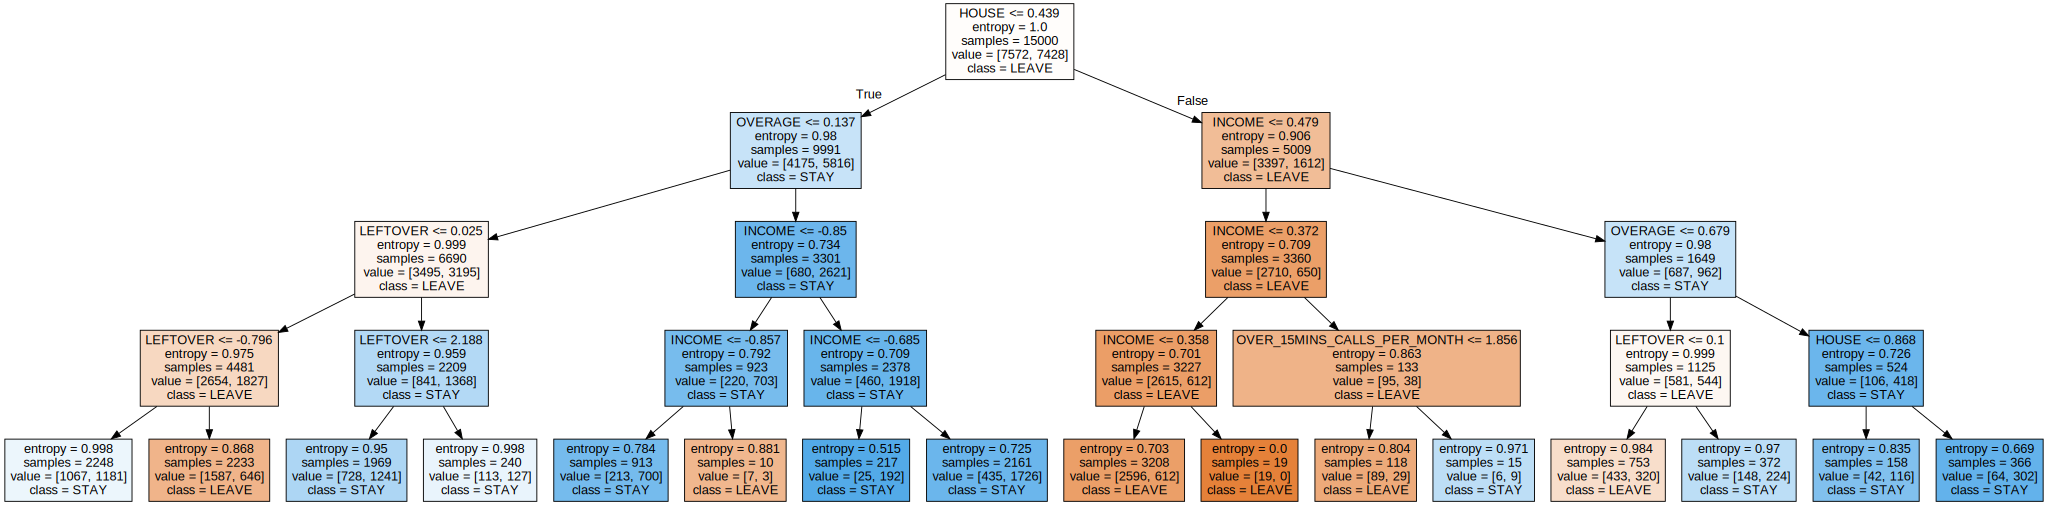

In [21]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=["COLLEGE","INCOME","OVERAGE","LEFTOVER","HOUSE",
                                "HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION",
                                "REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN"],  
                                class_names=["LEAVE","STAY"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph

In [22]:
def convert_features_to_one_hot(df, feature_name_list):
  for feature_name in feature_name_list:
    df = pd.get_dummies(df, columns=[feature_name])

  return df

In [23]:
catList = ['COLLEGE','REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
X_Train = convert_features_to_one_hot(X_Train,catList)
X_Test = convert_features_to_one_hot(X_Test,catList)

In [24]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(penalty='l2',max_iter=10000)
LR_model = LR_model.fit(X_Train,Y_Train)

In [25]:
LR_pred = LR_model.predict(X_Test)
accuracy = accuracy_score(Y_Test, LR_pred)
print('Logistic Regression model achieved an accuracy of {}%'.format(round(accuracy*100,2)))

Logistic Regression model achieved an accuracy of 64.44%


In [26]:
LR_pred_train = LR_model.predict(X_Train)
print('Logistic Regression model achieved an accuracy of {0:0.3f}'.format(metrics.accuracy_score(Y_Train, LR_pred_train)))

Logistic Regression model achieved an accuracy of 0.627


In [27]:
import torch
from torch import nn, optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [28]:
# Convert training data to PyTorch tensors and move to device
X_nn_train = torch.tensor(X_Train.values.astype('float32')).to(device)
Y_nn_train = torch.tensor(Y_Train.values, dtype=torch.long).to(device)

# Convert validation data to PyTorch tensors and move to device
X_val = torch.tensor(X_Test.values.astype('float32')).to(device)
Y_val = torch.tensor(Y_Test.values, dtype=torch.long).to(device)

# Convert test data to PyTorch tensors and move to device
X_nn_test = torch.tensor(X_Test.values.astype('float32')).to(device)

In [29]:
D = X_Train.shape[1]  # feature dimensions
C = 2  # num_classes
H = 5  # num_hidden_units

# Set learning rate and regularization strength
learning_rate = 1e-3
lambda_l2 = 1e-3

# Set number of training epochs
epochs = 27000

In [30]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(), #if t < n_networks // 3 else nn.Tanh(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, C)
)

model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

In [31]:
for t in range(epochs):
    # Feed forward to get the logits
    y_nn_pred = model(X_nn_train)

    # Compute the loss and accuracy
    loss = criterion(y_nn_pred, Y_nn_train)
    score, predicted = torch.max(y_nn_pred, 1)
    acc = (Y_nn_train == predicted).sum().float() / len(Y_nn_train)

    # Print loss and accuracy every 1000 epochs
    if t % 1000 == 0:
        print(f"[EPOCH]: {t}, [LOSS]: {loss.item()}, [ACCURACY]: {acc}")

    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()

    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params.
    loss.backward()

    # Update params
    optimizer.step()

[EPOCH]: 0, [LOSS]: 3122.38232421875, [ACCURACY]: 0.4952000081539154
[EPOCH]: 1000, [LOSS]: 11.863287925720215, [ACCURACY]: 0.504800021648407
[EPOCH]: 2000, [LOSS]: 2.0301575660705566, [ACCURACY]: 0.6231333613395691
[EPOCH]: 3000, [LOSS]: 6.840029239654541, [ACCURACY]: 0.4952000081539154
[EPOCH]: 4000, [LOSS]: 11.075361251831055, [ACCURACY]: 0.5342000126838684
[EPOCH]: 5000, [LOSS]: 1.3744844198226929, [ACCURACY]: 0.6055333614349365
[EPOCH]: 6000, [LOSS]: 5.17982292175293, [ACCURACY]: 0.5092666745185852
[EPOCH]: 7000, [LOSS]: 1.0944993495941162, [ACCURACY]: 0.6284000277519226
[EPOCH]: 8000, [LOSS]: 4.277050018310547, [ACCURACY]: 0.4952666759490967
[EPOCH]: 9000, [LOSS]: 5.290910720825195, [ACCURACY]: 0.4952000081539154
[EPOCH]: 10000, [LOSS]: 1.6874253749847412, [ACCURACY]: 0.626466691493988
[EPOCH]: 11000, [LOSS]: 5.360770225524902, [ACCURACY]: 0.4952000081539154
[EPOCH]: 12000, [LOSS]: 4.689223289489746, [ACCURACY]: 0.5660666823387146
[EPOCH]: 13000, [LOSS]: 4.675927639007568, [ACCUR

In [32]:
with torch.no_grad():
  y_val_pred = model(X_val)
  _, predicted_val = torch.max(y_val_pred, 1)
  val_acc = (Y_val == predicted_val).sum().float() / len(Y_val)

  # Print validation accuracy
  print(f"Neural network model validation accuracy: {val_acc}")

Neural network model validation accuracy: 0.6362000107765198


In [33]:
with torch.no_grad():
  y_test_pred = model(X_nn_test)
  _, predicted_test = torch.max(y_test_pred, 1)
    


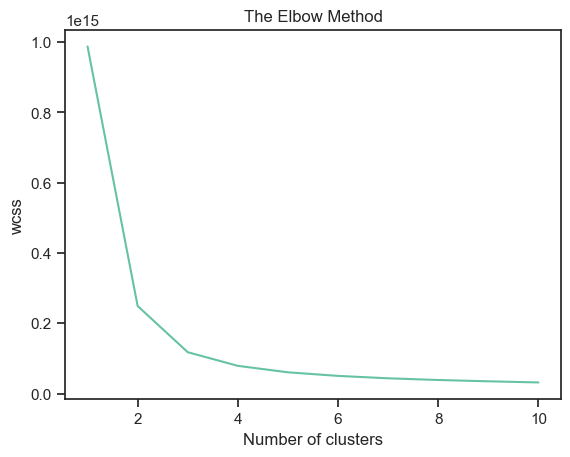

In [34]:
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X_Train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [35]:
kmeans=KMeans(n_clusters= 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X_Train, Y_Train)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [36]:
kmeans.cluster_centers_

array([[7.98041954e+04, 8.70113226e+01, 2.39862160e+01, 7.59481946e+05,
        3.85223663e+02, 8.08861175e+00, 6.01903512e+00, 4.96389892e-01,
        5.03610108e-01, 3.99081063e-01, 1.95109944e-01, 9.94420742e-02,
        4.95569413e-02, 2.56809977e-01, 2.01017394e-01, 3.98260584e-01,
        4.92287496e-02, 9.79652117e-02, 2.53528060e-01, 1.02559895e-01,
        1.99048244e-01, 5.51361995e-02, 3.99409255e-01, 2.43846406e-01],
       [8.07734553e+04, 8.48905232e+01, 2.37189535e+01, 3.07607041e+05,
        3.91904334e+02, 7.91095890e+00, 6.02638671e+00, 5.01122839e-01,
        4.98877161e-01, 3.91646081e-01, 2.00538962e-01, 9.97080620e-02,
        5.44576690e-02, 2.53649225e-01, 2.01774085e-01, 3.93218055e-01,
        5.10891534e-02, 1.04087132e-01, 2.49831574e-01, 1.00830901e-01,
        1.97956434e-01, 5.06400180e-02, 3.98270829e-01, 2.52301819e-01]])

In [37]:
y_kmeans = kmeans.fit_predict(X_Test)

In [38]:
accuracy = accuracy_score(Y_Test, y_kmeans)

print('K-means clustering model achieved an accuracy of {}%'.format(round(accuracy*100,2)))

K-means clustering model achieved an accuracy of 61.06%


In [39]:
y_kmeans_train = kmeans.predict(X_Train)
print('K-means clustering model achieved an accuracy of {0:0.2f}%'.format(metrics.accuracy_score(Y_Train, LR_pred_train)*100))

K-means clustering model achieved an accuracy of 62.71%


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
accuracy_score(Y_Test, Y_Pred)

[[1608  968]
 [ 521 1903]]


0.7022

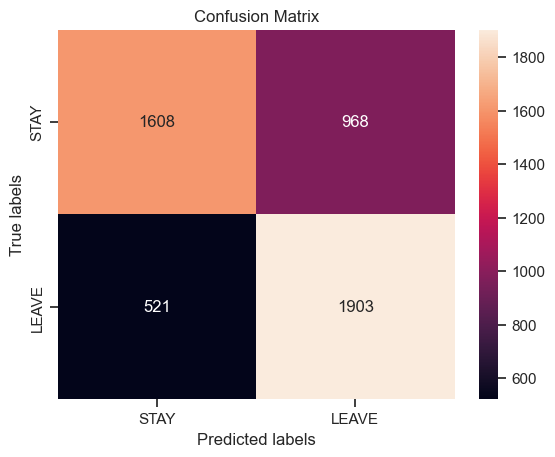

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['STAY', 'LEAVE']); ax.yaxis.set_ticklabels(['STAY', 'LEAVE']);

In [42]:
kcm = confusion_matrix(Y_Test, Y_knn_pred)
print(kcm)
accuracy_score(Y_Test, Y_knn_pred)

[[1914  662]
 [ 917 1507]]


0.6842

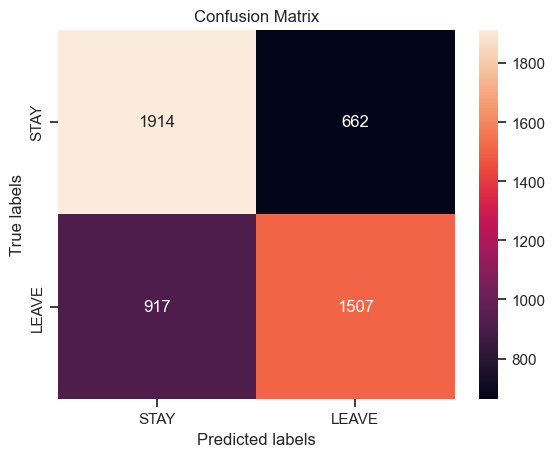

In [43]:
kax= plt.subplot()
sns.heatmap(kcm, annot=True, fmt='g', ax=kax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
kax.set_xlabel('Predicted labels');kax.set_ylabel('True labels'); 
kax.set_title('Confusion Matrix'); 
kax.xaxis.set_ticklabels(['STAY', 'LEAVE']); kax.yaxis.set_ticklabels(['STAY', 'LEAVE']);

In [44]:
lcm = confusion_matrix(Y_Test, LR_pred)
print(lcm)
accuracy_score(Y_Test, LR_pred)

[[1705  871]
 [ 907 1517]]


0.6444

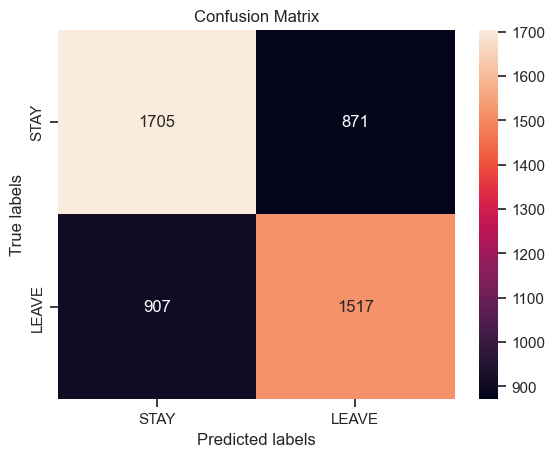

In [45]:
lax= plt.subplot()
sns.heatmap(lcm, annot=True, fmt='g', ax=lax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
lax.set_xlabel('Predicted labels');lax.set_ylabel('True labels'); 
lax.set_title('Confusion Matrix'); 
lax.xaxis.set_ticklabels(['STAY', 'LEAVE']); lax.yaxis.set_ticklabels(['STAY', 'LEAVE']);

In [46]:
licm = confusion_matrix(Y_Test, np.round(linear_pred))
print(licm)
accuracy_score(Y_Test, np.round(linear_pred))

[[1757  819]
 [ 918 1506]]


0.6526

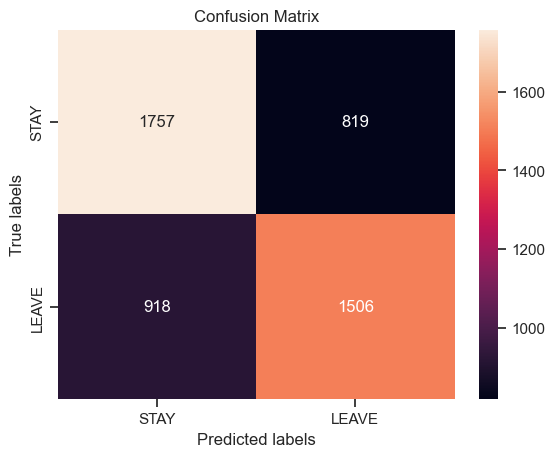

In [47]:
liax= plt.subplot()
sns.heatmap(licm, annot=True, fmt='g', ax=liax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
liax.set_xlabel('Predicted labels');liax.set_ylabel('True labels'); 
liax.set_title('Confusion Matrix'); 
liax.xaxis.set_ticklabels(['STAY', 'LEAVE']); liax.yaxis.set_ticklabels(['STAY', 'LEAVE']);

In [48]:
ncm = confusion_matrix(Y_Test, predicted_val)
print(ncm)
accuracy_score(Y_Test, predicted_val)

[[2246  330]
 [1489  935]]


0.6362

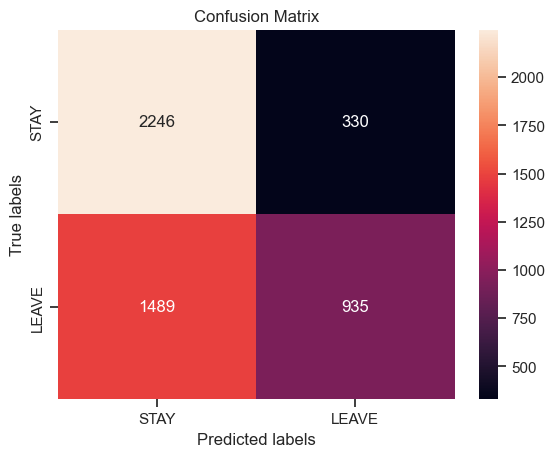

In [49]:
nax= plt.subplot()
sns.heatmap(ncm, annot=True, fmt='g', ax=nax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
nax.set_xlabel('Predicted labels');nax.set_ylabel('True labels'); 
nax.set_title('Confusion Matrix'); 
nax.xaxis.set_ticklabels(['STAY', 'LEAVE']); nax.yaxis.set_ticklabels(['STAY', 'LEAVE']);

In [50]:
kmcm = confusion_matrix(Y_Test, y_kmeans)
print(kmcm)
accuracy_score(Y_Test, y_kmeans)

[[1348 1228]
 [ 719 1705]]


0.6106

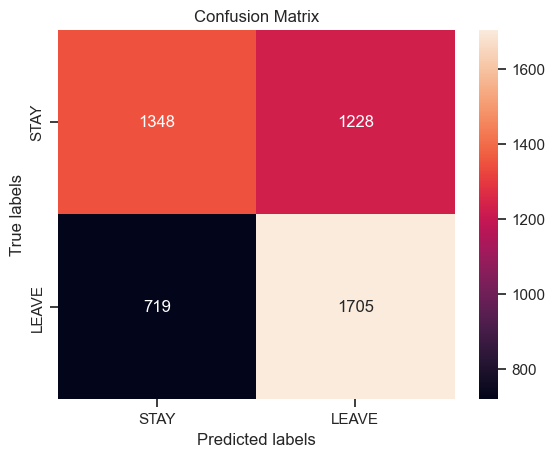

In [51]:
kmax= plt.subplot()
sns.heatmap(kmcm, annot=True, fmt='g', ax=kmax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
kmax.set_xlabel('Predicted labels');kmax.set_ylabel('True labels'); 
kmax.set_title('Confusion Matrix'); 
kmax.xaxis.set_ticklabels(['STAY', 'LEAVE']); kmax.yaxis.set_ticklabels(['STAY', 'LEAVE']);

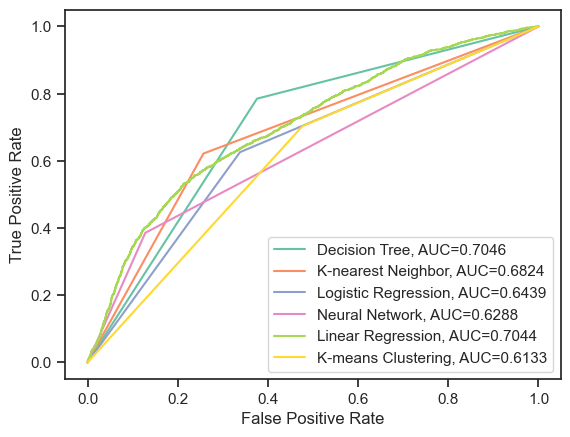

In [52]:
fpr, tpr, _ = metrics.roc_curve(Y_Test, Y_Pred)
auc = round(metrics.roc_auc_score(Y_Test, Y_Pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(Y_Test, Y_knn_pred)
auc = round(metrics.roc_auc_score(Y_Test, Y_knn_pred), 4)
plt.plot(fpr,tpr,label="K-nearest Neighbor, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(Y_Test, LR_pred)
auc = round(metrics.roc_auc_score(Y_Test, LR_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(Y_Test, predicted_val)
auc = round(metrics.roc_auc_score(Y_Test, predicted_val), 4)
plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(Y_Test, linear_pred)
auc = round(metrics.roc_auc_score(Y_Test, linear_pred), 4)
plt.plot(fpr,tpr,label="Linear Regression, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(Y_Test, y_kmeans)
auc = round(metrics.roc_auc_score(Y_Test, y_kmeans), 4)
plt.plot(fpr,tpr,label="K-means Clustering, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [53]:
lm.coef_

array([ 0.00630257,  0.0294908 ,  0.09599103,  0.05229506, -0.1048528 ,
        0.02142592,  0.0254322 ,  0.02814702, -0.00722428,  0.00077144,
       -0.00672505])

In [54]:
df.describe()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,1.566100,1.815050,2.494000,0.492600
std,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,1.629437,1.511839,1.323538,0.499958
min,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,1.000000,1.000000,3.000000,0.000000
75%,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,4.000000,4.000000,3.000000,1.000000
max,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000,4.000000,4.000000,4.000000,1.000000
